Trần Hữu Nhân - CE181655 - DAP391m - LAB 5 - Implement Credit Card Fraud Detection model using SVM

# **DATASET**
```
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

# **Importing the libraries**

In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline

# **Data loading** 

In [2]:
data = pd.read_csv('Lab5_creditcard.csv')
df = pd.DataFrame(data)                                          

# **Visualising the data**

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


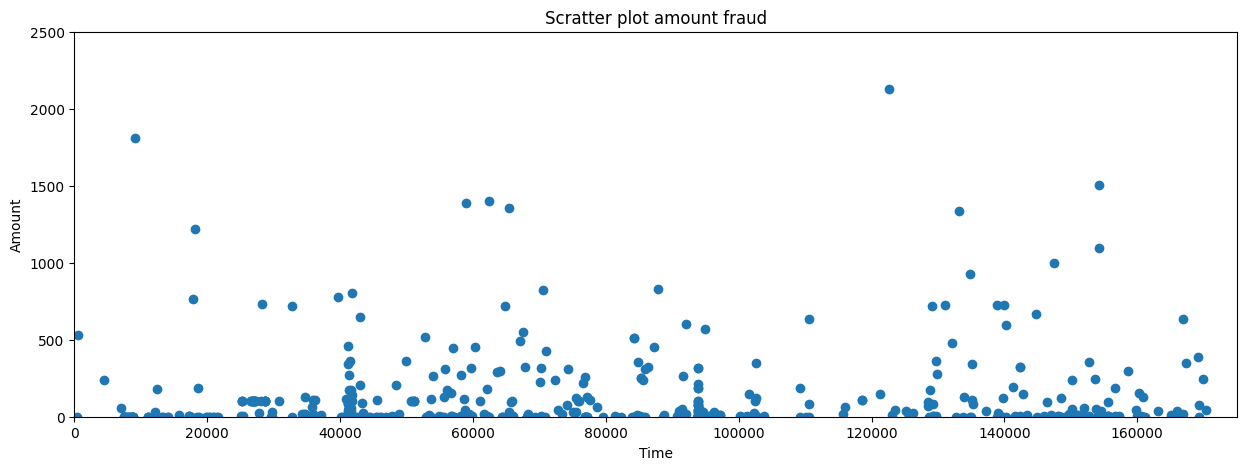

In [7]:
# Fraud data
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
# Limits x-axis in range (0 - 175,000 units)
plt.xlim([0,175000])
# Limits y-axis in range (0 - 2,500 units)
plt.ylim([0,2500])
plt.show()

**From the plot show that Time doesn't affect too much Amount variable**

In [13]:
# Shape[0] Indicate the rows = total values over 1000
fraud_over_1000 = df_fraud[df_fraud['Amount'] > 1000].shape[0]
print(fraud_over_1000)

9


# **Checking for unbalanced or balanced data**

In [21]:
# data.Class == 1 = Extract 1 row class 1, data[data] = all rows in data
fraud = len(data[data.Class == 1])
no_fraud = len(data[data.Class == 0])
print(f'Fraud = {fraud}')
print(f'No Fraud = {no_fraud}')

Fraud = 492
No Fraud = 284315


**The dataset strong unbalance between 2 classes(Approximately 577 times with the Fraud class compare to No Fraud)**

# **Correlation of features**

In [22]:
df_corr = df.corr() 

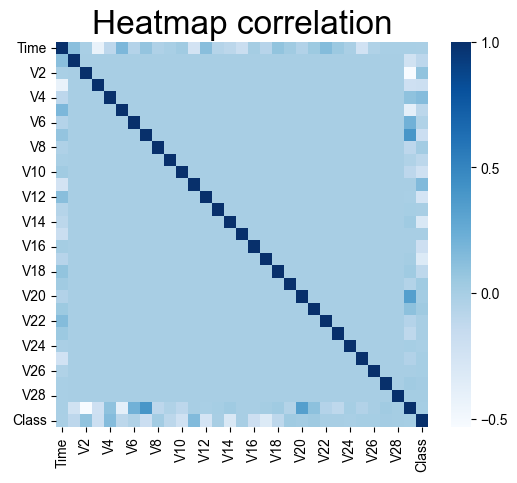

In [23]:
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues') 
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

**In heatmap show that the feature don't have much correlation imply that the dataset have applied the PCA technique**

# **Resampling the dataset to balance data**

#### **UNDERSAMPLING**

In [28]:
# Divide the dataset into half
df_train_all = df[0:(fraud + no_fraud)//2]

# Fraud
df_train_1 = df_train_all[df_train_all['Class'] == 1]
# No Fraud
df_train_0 = df_train_all[df_train_all['Class'] == 0]

# Random select 300 samples of class 0 (No Fraud)
df_sample = df_train_0.sample(300)

# Ignore_index = Drop the order index in the orginal data, apply new index
df_train = pd.concat([df_train_1, df_sample], ignore_index = True)

# Sample = Select randome sample, frac = Shuffle 100% data, if frac = 0.5 = 50% data
df_train = df_train.sample(frac=1)
df_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
57,25198.0,-15.903635,10.393917,-19.133602,6.185969,-12.538021,-4.027030,-13.897827,10.662252,-2.844954,...,1.577548,-1.280137,-0.601295,0.040404,0.995502,-0.273743,1.688136,0.527831,99.99,1
532,44333.0,1.412074,-0.598241,-0.152532,-1.202920,-0.615923,-0.458212,-0.429190,-0.091612,-1.081094,...,-0.547863,-1.203970,0.034672,-0.480162,0.134321,1.300669,-0.105899,-0.016033,21.02,0
503,77792.0,-1.660531,-0.680006,2.694710,1.490500,0.967153,-0.480082,-0.821773,0.337738,-0.419781,...,0.343766,0.585564,0.115141,0.096817,0.161503,-0.154790,0.085137,0.128318,45.00,0
499,75576.0,-0.607359,1.224690,1.307722,0.098713,-0.236668,-1.220412,0.639445,-0.033486,-0.093577,...,-0.282872,-0.722105,0.056528,0.632629,-0.179236,0.059550,0.346120,0.163225,3.57,0
535,20379.0,1.205845,-0.275268,1.173405,-0.434298,-1.321738,-0.965230,-0.656483,-0.127022,3.110669,...,-0.136953,0.067272,0.009059,0.670128,0.423330,-0.745933,0.064086,0.033681,11.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,79421.0,-0.773458,0.575642,1.535028,1.489387,0.262468,-0.264008,0.583476,0.073504,-0.383735,...,0.052528,0.345110,0.073840,0.430718,-0.079866,-0.247028,0.402262,0.219806,60.66,0
101,36170.0,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1
534,48471.0,-1.412780,0.840323,1.533320,1.189643,0.569527,0.041699,0.454039,-0.012294,0.034444,...,-0.140698,0.341249,-0.305254,0.265558,0.082984,-0.250223,0.360125,0.170749,20.91,0
172,53076.0,1.296231,0.417447,0.193963,0.901644,0.130531,-0.371634,0.158126,-0.202669,-0.079512,...,-0.112114,-0.220002,-0.121022,-0.440454,0.671540,-0.413518,0.032838,0.020600,1.18,1


In [29]:
# Drop useless features and Remove Class to convert target
X_train = df_train.drop(['Time', 'Class'],axis=1)

# Create a target class your y_train
y_train = df_train['Class']
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [30]:
# Collect remain half dataset for testing
df_test_all = df[(fraud + no_fraud)//2:]

# Drop X_test and collect target class for y_test
X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

# **Function of Confusion Matrix**

In [31]:
class_names=np.array(['0','1']) # Binary label

In [37]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **Applying the SVM**

#**Training the model**

In [44]:
classifier = svm.SVC(kernel='linear')

In [45]:
# Fit kernel 'linear' SVC for X_train and y_train
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
prediction_SVM = classifier.predict(X_train)

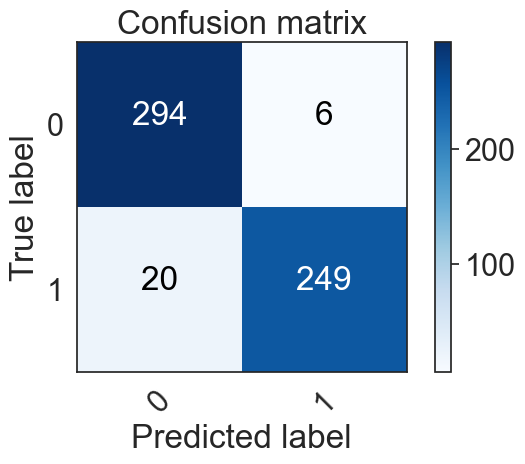

In [38]:
cm = confusion_matrix(y_train, prediction_SVM)
plot_confusion_matrix(cm,class_names)

# **Testing the model**

In [48]:
prediction_SVM_all = classifier.predict(X_test_all)

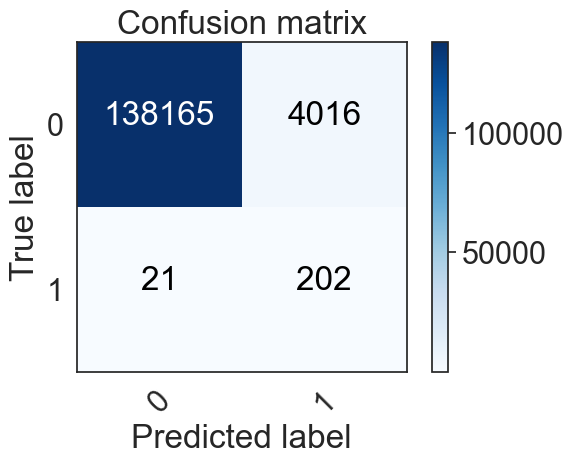

In [49]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

**The predict seems bias for the Class 0 (No Fraud)**

# **Re-balancing the class weights :**

In [51]:
classifier_with_weight = svm.SVC(kernel='linear', class_weight={0:0.60, 1:0.40})
classifier_with_weight.fit(X_train, y_train)

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

# **Re-Testing the model**

In [52]:
prediction_SVM_with_weight = classifier_with_weight.predict(X_test_all)

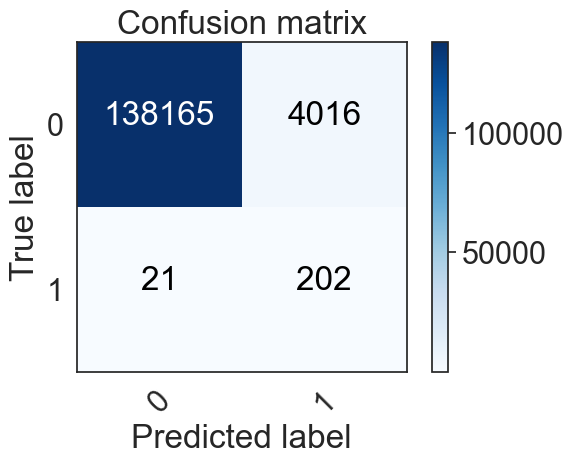

In [54]:
# Actual first, predict second
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm, class_names)

# **Changing the Kernel to enhance the performance Re-balance**

## **Polynomial Kernel**

In [58]:
classifier_with_weight_Poly = svm.SVC(kernel='poly', class_weight={0:0.60,1:0.40}).fit(X_train, y_train)
prediction_SVM_Poly = classifier_with_weight_Poly.predict(X_test_all) 

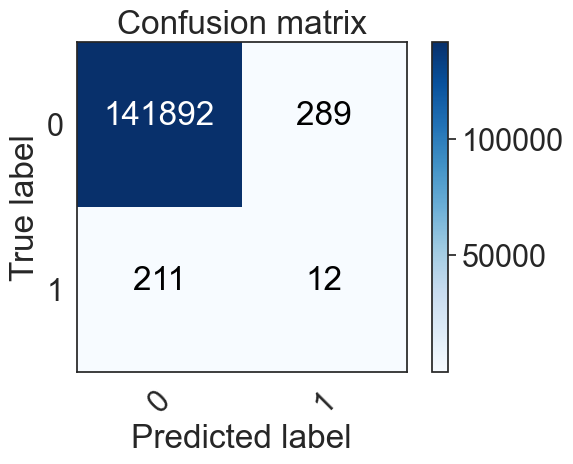

In [59]:
cm = confusion_matrix(y_test_all, prediction_SVM_Poly)
plot_confusion_matrix(cm,class_names)

## **RBF(Radial basis function) Kernel**

In [61]:
classifier_with_weight_RBF = svm.SVC(kernel = 'rbf', class_weight={0:0.60,1:0.40}).fit(X_train, y_train)
prediction_SVM_with_weight_RBF = classifier_with_weight_RBF.predict(X_test_all)

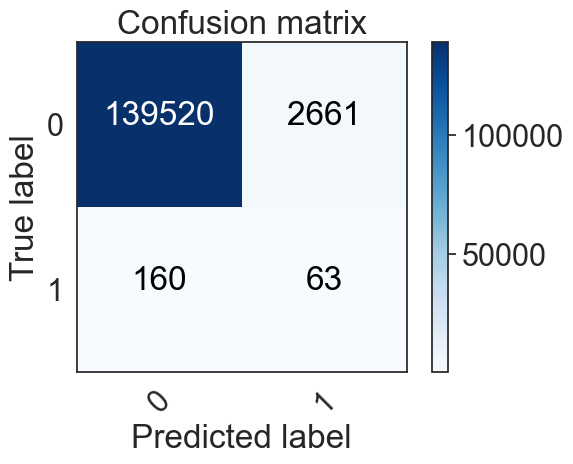

In [64]:
cm = confusion_matrix(y_test_all, prediction_SVM_with_weight_RBF)
plot_confusion_matrix(cm,class_names)

## **Sigmoid Kernel**

In [65]:
classifier_with_weight_Sigmoid = svm.SVC(kernel='sigmoid', class_weight={0:0.60,1:0.40}).fit(X_train, y_train)
prediction_SVM_Sigmoid = classifier_with_weight_Sigmoid.predict(X_test_all)

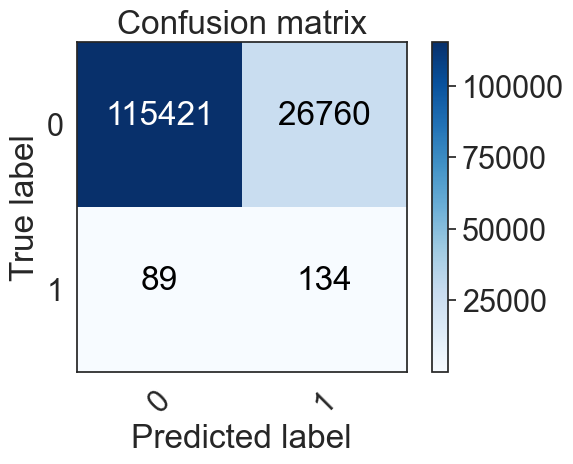

In [66]:
cm = confusion_matrix(y_test_all, prediction_SVM_Sigmoid)
plot_confusion_matrix(cm,class_names)

## **Precision, Recall, F1-Score, Mean Absolute Error, and Mean Squared Error**

In [72]:
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error
evaluation = classification_report(y_test_all, prediction_SVM_Sigmoid)
print(evaluation)

              precision    recall  f1-score   support

           0       1.00      0.81      0.90    142181
           1       0.00      0.60      0.01       223

    accuracy                           0.81    142404
   macro avg       0.50      0.71      0.45    142404
weighted avg       1.00      0.81      0.89    142404



In [73]:
mean_abs_error = mean_absolute_error(y_test_all, prediction_SVM_Sigmoid)
print(f"Mean Absolute Error: {mean_abs_error}")
mean_square_error = mean_squared_error(y_test_all, prediction_SVM_Sigmoid)
print(f"Mean Square Error: {mean_square_error}")

Mean Absolute Error: 0.18854105221763434
Mean Square Error: 0.18854105221763434


**From the report and evaluation metrics (MAE, MSE), this show the model using kernel Sigmoid in SVM performance well in  weighted avg (The metrics significant show performance for model on unbalance dataset). In the MAE and MSE show model closely perfect.**